<a href="https://colab.research.google.com/github/Dimildizio/DS_course/blob/main/Neural_networks/NLP/Langchain/Mistral/MIstral_models_zoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Selection

### Get API Key

In [ ]:
from helper import load_mistral_api_key
api_key, dlai_endpoint = load_mistral_api_key(ret_key=True)

- Note: in the classroom, if you print out this `api_key` variable, it is not a real API key (for security reasons).
- If you wish to run this code on your own machine, outside of the classroom, you can still reuse the code that you see in `helper.py`.
- It uses [python-dotenv](https://pypi.org/project/python-dotenv/) library to securely save and load sensitive information such as API keys.

In [ ]:
import os
from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage

def mistral(user_message, model="mistral-small-latest", is_json=False):
    client = MistralClient(api_key=api_key, endpoint=dlai_endpoint)
    messages = [ChatMessage(role="user", content=user_message)]

    if is_json:
        chat_response = client.chat(
            model=model, messages=messages, response_format={"type": "json_object"}
        )
    else:
        chat_response = client.chat(model=model, messages=messages)

    return chat_response.choices[0].message.content

## Mistral Small

Good for simple tasks, fast inference, lower cost.
- classification

In [ ]:
prompt = """
Classify the following email to determine if it is spam or not.
Only respond with the exact text "Spam" or "Not Spam".

# Email:
🎉 Urgent! You've Won a $1,000,000 Cash Prize!
💰 To claim your prize, please click on the link below:
https://bit.ly/claim-your-prize
"""

In [ ]:
mistral(prompt, model="mistral-small-latest")

'Spam'

## Mistral Medium

Good for intermediate tasks such as language transformation.
- Composing text based on provided context (e.g. writing a customer service email based on purchase information).

In [ ]:
prompt = """
Compose a welcome email for new customers who have just made
their first purchase with your product.
Start by expressing your gratitude for their business,
and then convey your excitement for having them as a customer.
Include relevant details about their recent order.
Sign the email with "The Fun Shop Team".

Order details:
- Customer name: Steven
- Product: Silly warhammer hat
- Estimate date of delivery: Aug. 25, 2024
- Return policy: 30 days
"""

In [ ]:
response_medium = mistral(prompt, model="mistral-medium-latest")

In [ ]:
print(response_medium)

Subject: Welcome to The Fun Shop, Steven! Thank you for your first purchase.

Dear Steven,

We are thrilled to welcome you to The Fun Shop community! We are grateful for your business and excited to have you as a customer.

We wanted to take a moment to thank you for your recent purchase of the Silly Warhammer Hat. We hope it brings a smile to your face and adds some fun to your day. Your estimated delivery date is August 25, 2024, and we will do our best to get it to you as soon as possible.

In the meantime, please note that we offer a 30-day return policy, so if for any reason you are not satisfied with your purchase, you can return it for a full refund. We want to ensure that you are completely happy with your experience at The Fun Shop.

If you have any questions or concerns, please do not hesitate to reach out to our customer service team. They are available 24/7 to assist you.

Thank you again for choosing The Fun Shop, and we look forward to serving you in the future.

Best reg

## Mistral Large:

Good for complex tasks that require advanced reasoning.
- Math and reasoning with numbers.

In [ ]:
prompt = """
Calculate the difference in payment dates between the two \
customers whose payment amounts are closest to each other \
in the following dataset. Do not write code.

# dataset:
'{
  "transaction_id":{"0":"T1001","1":"T1002","2":"T1003","3":"T1004","4":"T1005"},
    "customer_id":{"0":"C001","1":"C002","2":"C003","3":"C002","4":"C001"},
    "payment_amount":{"0":125.5,"1":89.99,"2":120.0,"3":54.3,"4":210.2},
"payment_date":{"0":"2021-10-05","1":"2021-10-06","2":"2021-10-07","3":"2021-10-05","4":"2021-10-08"},
    "payment_status":{"0":"Paid","1":"Unpaid","2":"Paid","3":"Paid","4":"Pending"}
}'
"""

In [ ]:
response_small = mistral(prompt, model="mistral-small-latest")

In [ ]:
print(response_small)

The payment amounts closest to each other are 120.0 and 125.5, which belong to customers C003 and C001 respectively. The payment date for C003 is '2021-10-07' and the payment date for C001 is '2021-10-08'. The difference in payment dates between these two customers is 1 day.


In [ ]:
response_large = mistral(prompt, model="mistral-large-latest")

In [ ]:
print(response_large)

To calculate the difference in payment dates between the two customers whose payment amounts are closest to each other, follow these steps:

1. **Identify the Payment Amounts:**
   - T1001: 125.5
   - T1002: 89.99
   - T1003: 120.0
   - T1004: 54.3
   - T1005: 210.2

2. **Determine the Closest Payment Amounts:**
   - Compare each pair of payment amounts to find the smallest difference.
   - The differences are:
     - |125.5 - 89.99| = 35.51
     - |125.5 - 120.0| = 5.5
     - |125.5 - 54.3| = 71.2
     - |125.5 - 210.2| = 84.7
     - |89.99 - 120.0| = 30.01
     - |89.99 - 54.3| = 35.69
     - |89.99 - 210.2| = 120.21
     - |120.0 - 54.3| = 65.7
     - |120.0 - 210.2| = 90.2
     - |54.3 - 210.2| = 155.9

   - The smallest difference is 5.5 between 125.5 and 120.0.

3. **Identify the Corresponding Payment Dates:**
   - Payment amount 125.5 corresponds to T1001 with a payment date of 2021-10-05.
   - Payment amount 120.0 corresponds to T1003 with a payment date of 2021-10-07.

4. **Ca

## Expense reporting task

In [ ]:
transactions = """
McDonald's: 8.40
Safeway: 10.30
Carrefour: 15.00
Toys R Us: 20.50
Panda Express: 10.20
Beanie Baby Outlet: 25.60
World Food Wraps: 22.70
Stuffed Animals Shop: 45.10
Sanrio Store: 85.70
"""

prompt = f"""
Given the purchase details, how much did I spend on each category:
1) restaurants
2) groceries
3) stuffed animals and props
{transactions}
"""

In [ ]:
response_small = mistral(prompt, model="mistral-small-latest")
print(response_small)

Here's the breakdown of your spending:

1) Restaurants:
   McDonald's: $8.40
   Panda Express: $10.20
   Total: $18.60

2) Groceries:
   Safeway: $10.30
   Carrefour: $15.00
   World Food Wraps: $22.70
   Total: $48.00

3) Stuffed animals and props:
   Toys R Us: $20.50
   Beanie Baby Outlet: $25.60
   Stuffed Animals Shop: $45.10
   Sanrio Store: $85.70
   Total: $176.90


In [ ]:
response_large = mistral(prompt, model="mistral-large-latest")
print(response_large)

To determine how much you spent on each category, let's categorize the purchases and sum them up accordingly:

### 1) Restaurants
- McDonald's: $8.40
- Panda Express: $10.20
- World Food Wraps: $22.70

Total spent on restaurants: $8.40 + $10.20 + $22.70 = $41.30

### 2) Groceries
- Safeway: $10.30
- Carrefour: $15.00

Total spent on groceries: $10.30 + $15.00 = $25.30

### 3) Stuffed Animals and Props
- Toys R Us: $20.50
- Beanie Baby Outlet: $25.60
- Stuffed Animals Shop: $45.10
- Sanrio Store: $85.70

Total spent on stuffed animals and props: $20.50 + $25.60 + $45.10 + $85.70 = $176.90

### Summary
- Restaurants: $41.30
- Groceries: $25.30
- Stuffed Animals and Props: $176.90


## Writing and checking code

In [ ]:
user_message = """
Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

Your code should pass these tests:

assert twoSum([2,7,11,15], 9) == [0,1]
assert twoSum([3,2,4], 6) == [1,2]
assert twoSum([3,3], 6) == [0,1]
"""

In [ ]:
print(mistral(user_message, model="mistral-large-latest"))

To solve the problem of finding two indices in an array that add up to a given target, we can use a hash map (or dictionary in Python) to keep track of the numbers we've seen so far and their corresponding indices. This approach allows us to solve the problem in linear time, O(n).

Here's the step-by-step solution:

1. Initialize an empty dictionary to store the numbers we've seen and their indices.
2. Iterate through the array with an index.
3. For each number, calculate the complement that would add up to the target.
4. Check if the complement is already in the dictionary.
   - If it is, return the current index and the index of the complement.
   - If it is not, add the current number and its index to the dictionary.
5. If no solution is found by the end of the loop (which shouldn't happen based on the problem statement), return an empty list or raise an error.

Here's the implementation in Python:

```python
def twoSum(nums, target):
    num_to_index = {}
    for index, num in enum

In [ ]:
def twoSum(nums, target):
    seen = {}
    for i, num in enumerate(nums):
        complement = target - num
        if complement in seen:
            return [seen[complement], i]
        seen[num] = i

assert twoSum([2,7,11,15], 9) == [0,1]
assert twoSum([3,2,4], 6) == [1,2]
assert twoSum([3,3], 6) == [0,1]

### Try out the code that the model provided
- Copy the code that the model provided and try running it!

Here is the code that was output at the time of filming:
```Python
def twoSum(nums, target):
    seen = {}
    for i, num in enumerate(nums):
        complement = target - num
        if complement in seen:
            return [seen[complement], i]
        seen[num] = i
```
- Also try running the assert statements in the original prompt
```Python
assert twoSum([2,7,11,15], 9) == [0,1]
assert twoSum([3,2,4], 6) == [1,2]
assert twoSum([3,3], 6) == [0,1]
```

## Natively Fluent in English, French, Spanish, German, and Italian
- This means that you can use Mistral models for more than translating from one language to another.
- If you are a native Spanish speaker, for instance, you can communicate with Mistral models in Spanish for any of your tasks.

In [ ]:
user_message = """
Lequel est le plus lourd une livre de fer ou un kilogramme de plume
"""

In [ ]:
print(mistral(user_message, model="mistral-large-latest"))

La question est un peu trompeuse parce qu'elle compare deux unités de mesure différentes : la livre et le kilogramme.

- Une livre (lb) est une unité de mesure de masse dans le système impérial.
- Un kilogramme (kg) est une unité de mesure de masse dans le système métrique.

Pour comparer les deux, il faut convertir l'une des unités dans l'autre.

1 livre est approximativement égal à 0,453592 kilogrammes.

Donc, une livre de fer pèse environ 0,453592 kilogrammes, tandis qu'un kilogramme de plumes pèse 1 kilogramme.

Par conséquent, un kilogramme de plumes est plus lourd qu'une livre de fer.


## List of Mistral models that you can call:

You can also call the two open source mistral models via API calls.
Here is the list of models that you can try:
```
open-mistral-7b
open-mixtral-8x7b
open-mixtral-8x22b
mistral-small-latest
mistral-medium-latest
mistral-large-latest
```

For example:
```Python
mistral(prompt, model="open-mixtral-8x22b")
```

Note that we just released the `open-mixtral-8x22b` model. Check out our [release blog](https://mistral.ai/news/mixtral-8x22b/) for details.

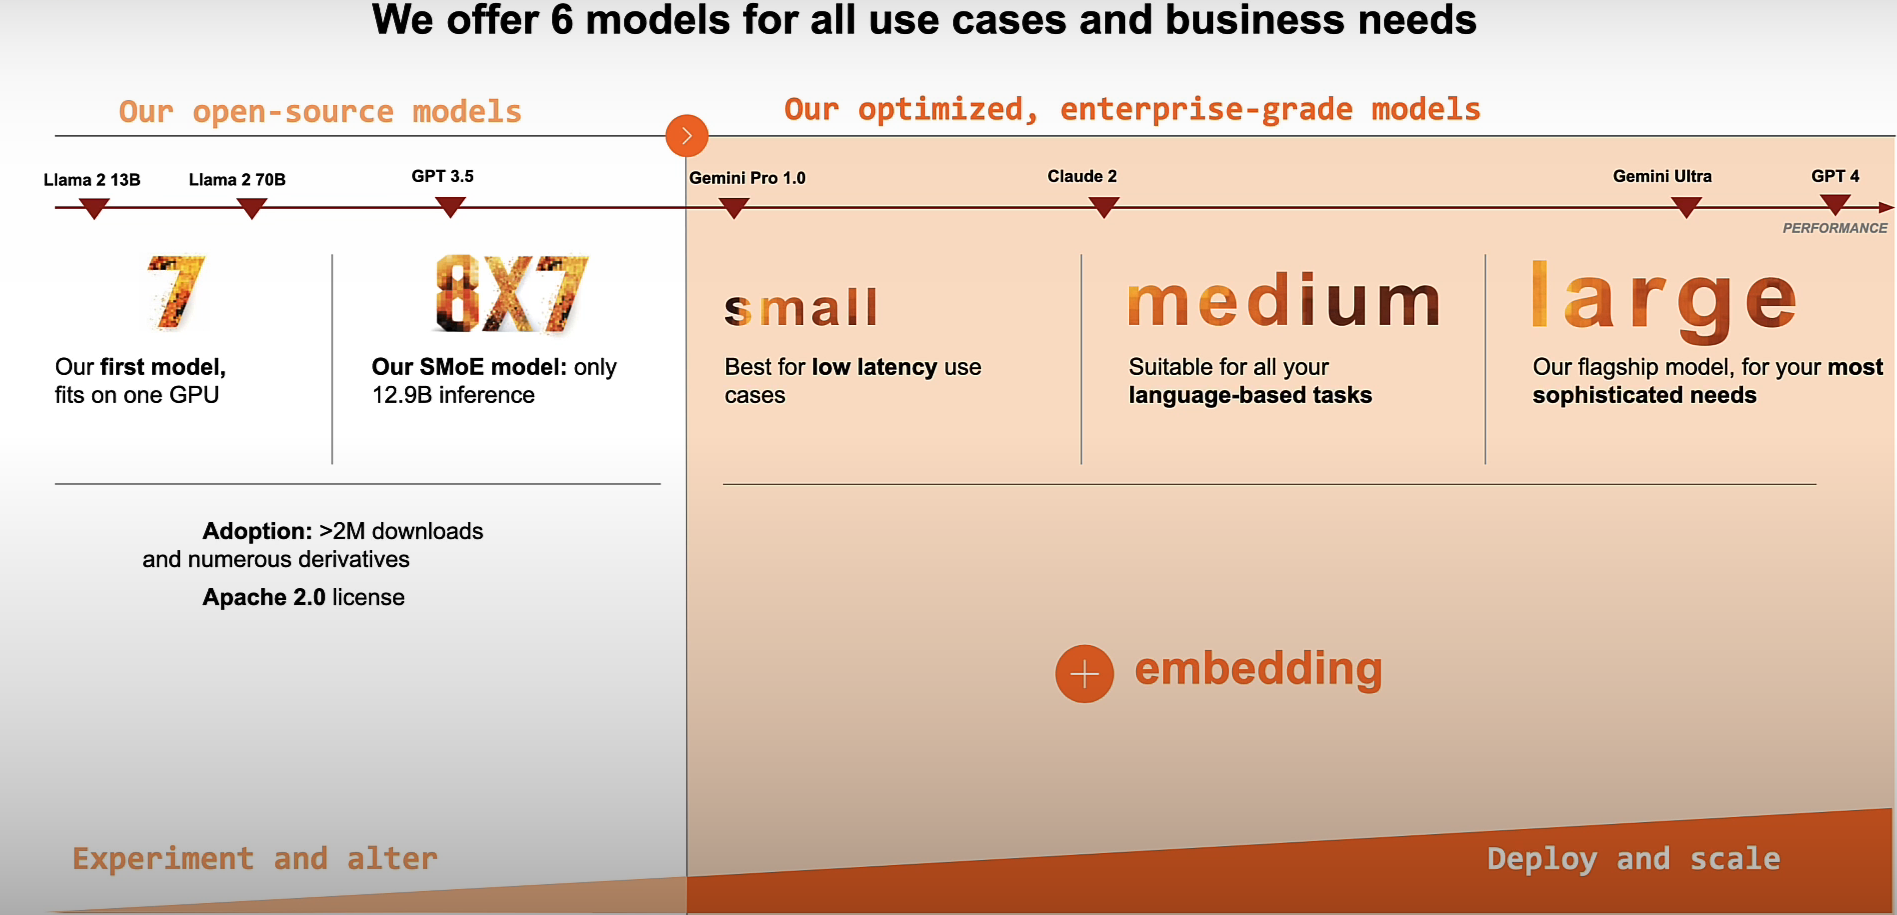